## Importar paquetes

In [1]:
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Cargar datos y explorar datos

In [2]:
import ssl
from keras.datasets import cifar10
# https://stackoverflow.com/a/69692664/11026428
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [5]:
index = 200
x_train[index]

array([[[105, 155, 204],
        [ 99, 150, 206],
        [111, 149, 195],
        ...,
        [113, 160,  87],
        [150, 197, 134],
        [164, 216, 142]],

       [[113, 169, 210],
        [ 85, 132, 183],
        [ 70, 101, 131],
        ...,
        [ 72, 136,  58],
        [107, 176, 102],
        [140, 207, 136]],

       [[106, 165, 209],
        [ 90, 132, 189],
        [ 47,  71, 108],
        ...,
        [ 75, 129,  89],
        [117, 185, 111],
        [120, 193, 111]],

       ...,

       [[ 55,  74, 127],
        [ 32,  13,  34],
        [ 36,  30,  21],
        ...,
        [ 12, 103,  76],
        [ 44,  92, 116],
        [103, 146, 186]],

       [[ 49, 103,  75],
        [ 50,  57,  21],
        [ 57,  76,  25],
        ...,
        [ 42, 141,  87],
        [ 86, 150, 154],
        [117, 172, 202]],

       [[ 60, 146,  50],
        [ 93, 137,  45],
        [ 95, 156,  63],
        ...,
        [ 97, 180, 151],
        [ 92, 165, 173],
        [ 84, 160, 196]]

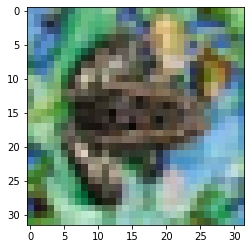

In [6]:
img = plt.imshow(x_train[index])

In [7]:
classification_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("Label value: ", y_train[index])
print("Label word: ", classification_labels[y_train[index][0]])

Label value:  [6]
Label word:  frog


## Covertir las etiquetas en números

In [8]:
y_train_numbers = to_categorical(y_train)
y_test_numbers = to_categorical(y_test)

print("Label number: ", y_train_numbers[index])

Label number:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Normalizar los pixels a valores entre 0 y 1

In [9]:
x_train = x_train / 255
x_test = x_test / 255
x_train[index]

array([[[0.41176471, 0.60784314, 0.8       ],
        [0.38823529, 0.58823529, 0.80784314],
        [0.43529412, 0.58431373, 0.76470588],
        ...,
        [0.44313725, 0.62745098, 0.34117647],
        [0.58823529, 0.77254902, 0.5254902 ],
        [0.64313725, 0.84705882, 0.55686275]],

       [[0.44313725, 0.6627451 , 0.82352941],
        [0.33333333, 0.51764706, 0.71764706],
        [0.2745098 , 0.39607843, 0.51372549],
        ...,
        [0.28235294, 0.53333333, 0.22745098],
        [0.41960784, 0.69019608, 0.4       ],
        [0.54901961, 0.81176471, 0.53333333]],

       [[0.41568627, 0.64705882, 0.81960784],
        [0.35294118, 0.51764706, 0.74117647],
        [0.18431373, 0.27843137, 0.42352941],
        ...,
        [0.29411765, 0.50588235, 0.34901961],
        [0.45882353, 0.7254902 , 0.43529412],
        [0.47058824, 0.75686275, 0.43529412]],

       ...,

       [[0.21568627, 0.29019608, 0.49803922],
        [0.1254902 , 0.05098039, 0.13333333],
        [0.14117647, 0

## Arquitectura para el modelo

In [12]:
model = Sequential()

# First layer
model.add(Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3)))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution layer
model.add(Conv2D(32, (5, 5), activation="relu"))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening layer
model.add(Flatten())

# Neurons
# 1000 neurons layer
model.add(Dense(1000, activation="relu"))

# Dropout layer 50%
model.add(Dropout(0.5))

# 500 neurons layer
model.add(Dense(500, activation="relu"))

# Dropout layer 50%
model.add(Dropout(0.5))

# 250 neurons layer
model.add(Dense(250, activation="relu"))

# 10 neurons layer
model.add(Dense(10, activation="softmax"))


In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
hist = model.fit(x_train, y_train_numbers, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 14s 88ms/step - loss: 1.7893 - accuracy: 0.3271 - val_loss: 1.4938 - val_accuracy: 0.4497
Epoch 2/10
157/157 [==============================] - 13s 81ms/step - loss: 1.4125 - accuracy: 0.4821 - val_loss: 1.2724 - val_accuracy: 0.5474
Epoch 3/10
157/157 [==============================] - 13s 83ms/step - loss: 1.2443 - accuracy: 0.5528 - val_loss: 1.2145 - val_accuracy: 0.5717
Epoch 4/10
157/157 [==============================] - 13s 83ms/step - loss: 1.1425 - accuracy: 0.5921 - val_loss: 1.1175 - val_accuracy: 0.6003
Epoch 5/10
157/157 [==============================] - 13s 81ms/step - loss: 1.0386 - accuracy: 0.6302 - val_loss: 1.1188 - val_accuracy: 0.6063
Epoch 6/10
157/157 [==============================] - 13s 83ms/step - loss: 0.9614 - accuracy: 0.6609 - val_loss: 1.0144 - val_accuracy: 0.6465
Epoch 7/10
157/157 [==============================] - 13s 83ms/step - loss: 0.9050 - accuracy: 0.6806 - val_loss: 0.9648 - val_accuracy:

## Evaluar

In [15]:
model.evaluate(x_test, y_test_numbers)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.9744 - accuracy: 0.6671


0.6671000123023987

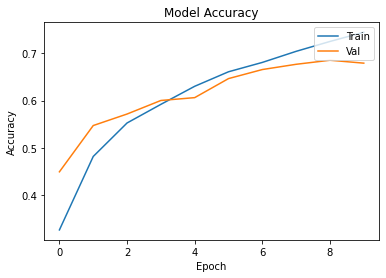

In [16]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")

## Probar modelo con ejemplo real

In [28]:
new_image = plt.imread("gatito.jpg")
print(new_image)

[[[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [195 241 106]
  [197 243 108]
  [199 245 110]]

 [[227 227 227]
  [237 237 237]
  [248 248 248]
  ...
  [193 239 104]
  [195 241 106]
  [197 243 108]]

 [[214 214 214]
  [229 229 229]
  [247 247 247]
  ...
  [192 236 101]
  [194 238 103]
  [196 240 105]]

 ...

 [[192 220 244]
  [190 218 242]
  [188 216 240]
  ...
  [171 216 249]
  [178 223 255]
  [170 215 248]]

 [[196 223 250]
  [193 220 247]
  [190 217 244]
  ...
  [171 216 249]
  [178 223 255]
  [170 215 248]]

 [[200 227 254]
  [197 224 251]
  [193 220 247]
  ...
  [171 216 249]
  [178 223 255]
  [170 215 248]]]


In [29]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))

In [30]:
predictions = model.predict(np.array([resized_image]))
predictions

1/1 [==============================] - 0s 56ms/step


array([[0.00183773, 0.00482739, 0.03951793, 0.62641126, 0.00462409,
        0.2544317 , 0.04641214, 0.01470944, 0.00331069, 0.00391759]],
      dtype=float32)

In [31]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

print(list_index)

[3, 5, 6, 2, 7, 1, 4, 9, 8, 0]


In [32]:
for i in range(5):
    print(classification_labels[list_index[i]])

cat
dog
frog
bird
horse
